<a href="https://colab.research.google.com/github/aneeshghisad/BTech-Project/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

path = '/content/drive/MyDrive/milknew.csv'
df = pd.read_csv(path)

df = df.drop(['Fat ','Taste'], axis=1)
df.head()

,pH,Temprature,Odor,Turbidity,Colour,Grade
0,6.6,35,0,0,254,high
1,6.6,36,1,1,253,high
2,8.5,70,1,1,246,low
3,9.5,34,1,1,255,low
4,6.6,37,0,0,255,medium


['high' 'low' 'medium']
[0 0 1 1 2 0 1 1 1 2]
Accuracy: 0.8742138364779874

Classification Report:
               precision    recall  f1-score   support

        high       0.94      0.61      0.74        76
         low       0.96      0.96      0.96       115
      medium       0.79      0.96      0.87       127

    accuracy                           0.87       318
   macro avg       0.90      0.84      0.85       318
weighted avg       0.89      0.87      0.87       318



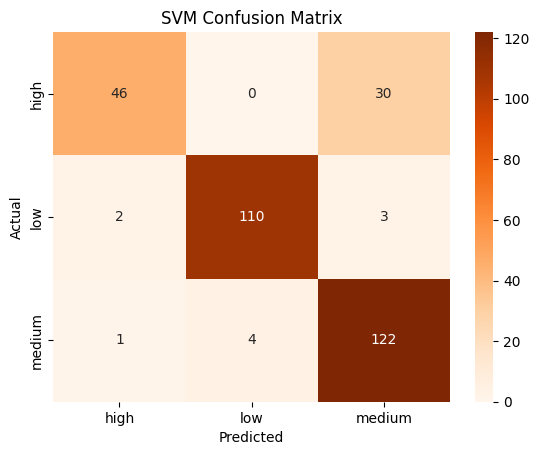

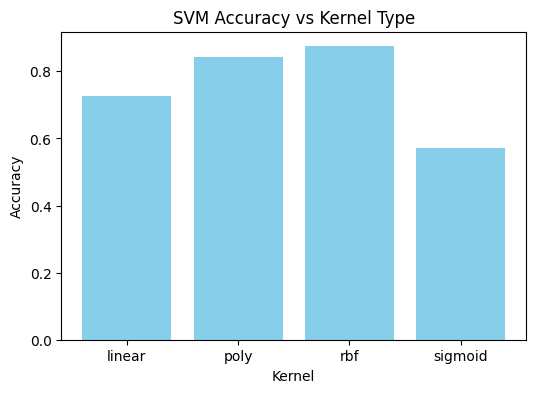

In [2]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


X = df.drop('Grade', axis=1)
y = df['Grade']
le = LabelEncoder()
y = le.fit_transform(y)

print(le.classes_)
print(y[:10])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Oranges')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for k in kernels:
    model = SVC(kernel=k, random_state=42)
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    accuracies.append(acc)

plt.figure(figsize=(6,4))
plt.bar(kernels, accuracies, color='skyblue')
plt.title("SVM Accuracy vs Kernel Type")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.show()


In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9797569381461999

Test Accuracy: 0.9748427672955975

Classification Report:
               precision    recall  f1-score   support

        high       0.96      0.93      0.95        76
         low       1.00      0.99      1.00       115
      medium       0.96      0.98      0.97       127

    accuracy                           0.97       318
   macro avg       0.97      0.97      0.97       318
weighted avg       0.97      0.97      0.97       318

